# Windt IMD vs Byrnes TMM
We investigate the differences between the output given by the IDL software package "IMD" of David L. Windt, and the python package "TMM" of Steven J. Byrnes. The IMD software package is considered the reference by default. We aim to transition from IMD to TMM given that the latter is written in python and is open source.
  
References:
* "IMD—Software for modeling the optical properties of multilayer films" by David L. Windt, Bell Laboratories, Murray Hill, New Jersey 07974, (Received 9 February 1998; accepted 31 March 1998)
* "Multilayer optical calculations" by Steven J. Byrnes, Charles Stark Draper Laboratory, Cambridge, Massachusetts, USA, ( accepted 30 August, 2016)

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

deg = np.pi/180. # conversion factor degrees to radians

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [12]:
# initialize placeholders
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}
n_ZnS,n_Si,n_BE,n_SiAs,n_Al = [{} for i in range(5)]
for band in wav.keys():
    n_ZnS[band]  = funcs.indexOfRefractionZnS(wav[band])
    n_Si[band]   = funcs.indexOfRefractionSi(wav[band])
    n_BE[band]   = funcs.indexOfRefractionBE(wav[band])
    n_SiAs[band] = funcs.indexOfRefractionSiAs(wav[band])
    n_Al[band] = funcs.indexOfRefractionAl(wav[band])

In [8]:
# load data
R,T,A = {},{},{}
for band in ['1A']:
    R[band],T[band],A[band] = {},{},{}
    #--(Incidence angle 0 deg) (vacuum - Si layer (465um))
    wav[band],R[band]['00'],T[band]['00'],A[band]['00'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_Si_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    ignore,R[band]['01'],T[band]['01'],A[band]['01'] = np.loadtxt(datapath+band+'_SpecRes0.001micron_IncidenceAngle0deg_Si_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    ignore,R[band]['02'],T[band]['02'],A[band]['02'] = np.loadtxt(datapath+band+'_SpecRes0.002micron_IncidenceAngle0deg_Si_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)

    #--(Incidence angle 0 deg) (vacuum - ZnS layer (0.65um) - Si layer (465um))
    ignore,R[band]['10'],T[band]['10'],A[band]['10'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_withARcoat.txt',unpack=True,usecols=(0,1,2,3),skiprows=15)
    ignore,R[band]['11'],T[band]['11'],A[band]['11'] = np.loadtxt(datapath+band+'_SpecRes0.001micron_IncidenceAngle0deg_withARcoat.txt',unpack=True,usecols=(0,1,2,3),skiprows=15)
    ignore,R[band]['12'],T[band]['12'],A[band]['12'] = np.loadtxt(datapath+band+'_SpecRes0.002micron_IncidenceAngle0deg_withARcoat.txt',unpack=True,usecols=(0,1,2,3),skiprows=15)
    
    #--(Incidence angle 0 deg) (vacuum - SiAs layer (35um))
    ignore,R[band]['20'],T[band]['20'],A[band]['20'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    ignore,R[band]['21'],T[band]['21'],A[band]['21'] = np.loadtxt(datapath+band+'_SpecRes0.001micron_IncidenceAngle0deg_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    ignore,R[band]['22'],T[band]['22'],A[band]['22'] = np.loadtxt(datapath+band+'_SpecRes0.002micron_IncidenceAngle0deg_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    
    #--(Incidence angle 0 deg) (vacuum - Si layer (465um) - SiAs layer (35um))
    ignore,R[band]['30'],T[band]['30'],A[band]['30'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_Si_layer_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=15)

    #--(Incidence angle 0 deg) (vacuum - ZnS layer (0.65um) - Si layer (465um) - SiAs layer (35um))
    ignore,R[band]['40'],T[band]['40'],A[band]['40'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_ZnS_layer_Si_layer_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=16)
    
    #--(Incidence angle 0 deg) (vacuum - ZnS layer (0.65um))
    ignore,R[band]['50'],T[band]['50'],A[band]['50'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_ZnS_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=14)
    
    #--(Incidence angle 10 deg) (vacuum - ZnS layer (0.65um) - Si layer (465um) - SiAs layer (35um))
    ignore,R[band]['60'],T[band]['60'],A[band]['60'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle10deg_ZnS_layer_Si_layer_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=16)
    
    #--(Incidence angle 0 deg) (vacuum - ZnS layer (0.65um) - Si layer (465um, sigma 0.1um) - SiAs layer (35um))
    ignore,R[band]['70'],T[band]['70'],A[band]['70'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_ZnS_layer_Si_layerRoughness0.1um_SiAs_layer.txt',unpack=True,usecols=(0,1,4,7),skiprows=16)   
    
    #--(Incidence angle 0 deg) (vacuum - ZnS layer (0.65um) - Si layer (465um, sigma 0.1um) - SiAs layer (35um) - Al substrate)
    ignore,R[band]['80'],T[band]['80'],A[band]['80'] = np.loadtxt(datapath+band+'_SpecRes0micron_IncidenceAngle0deg_ZnS_layer_Si_layer_SiAs_layer_Al_substrate.txt',unpack=True,usecols=(0,1,4,7),skiprows=17)      

### Test 1: Compare results for single silicon layer

<IPython.core.display.Javascript object>


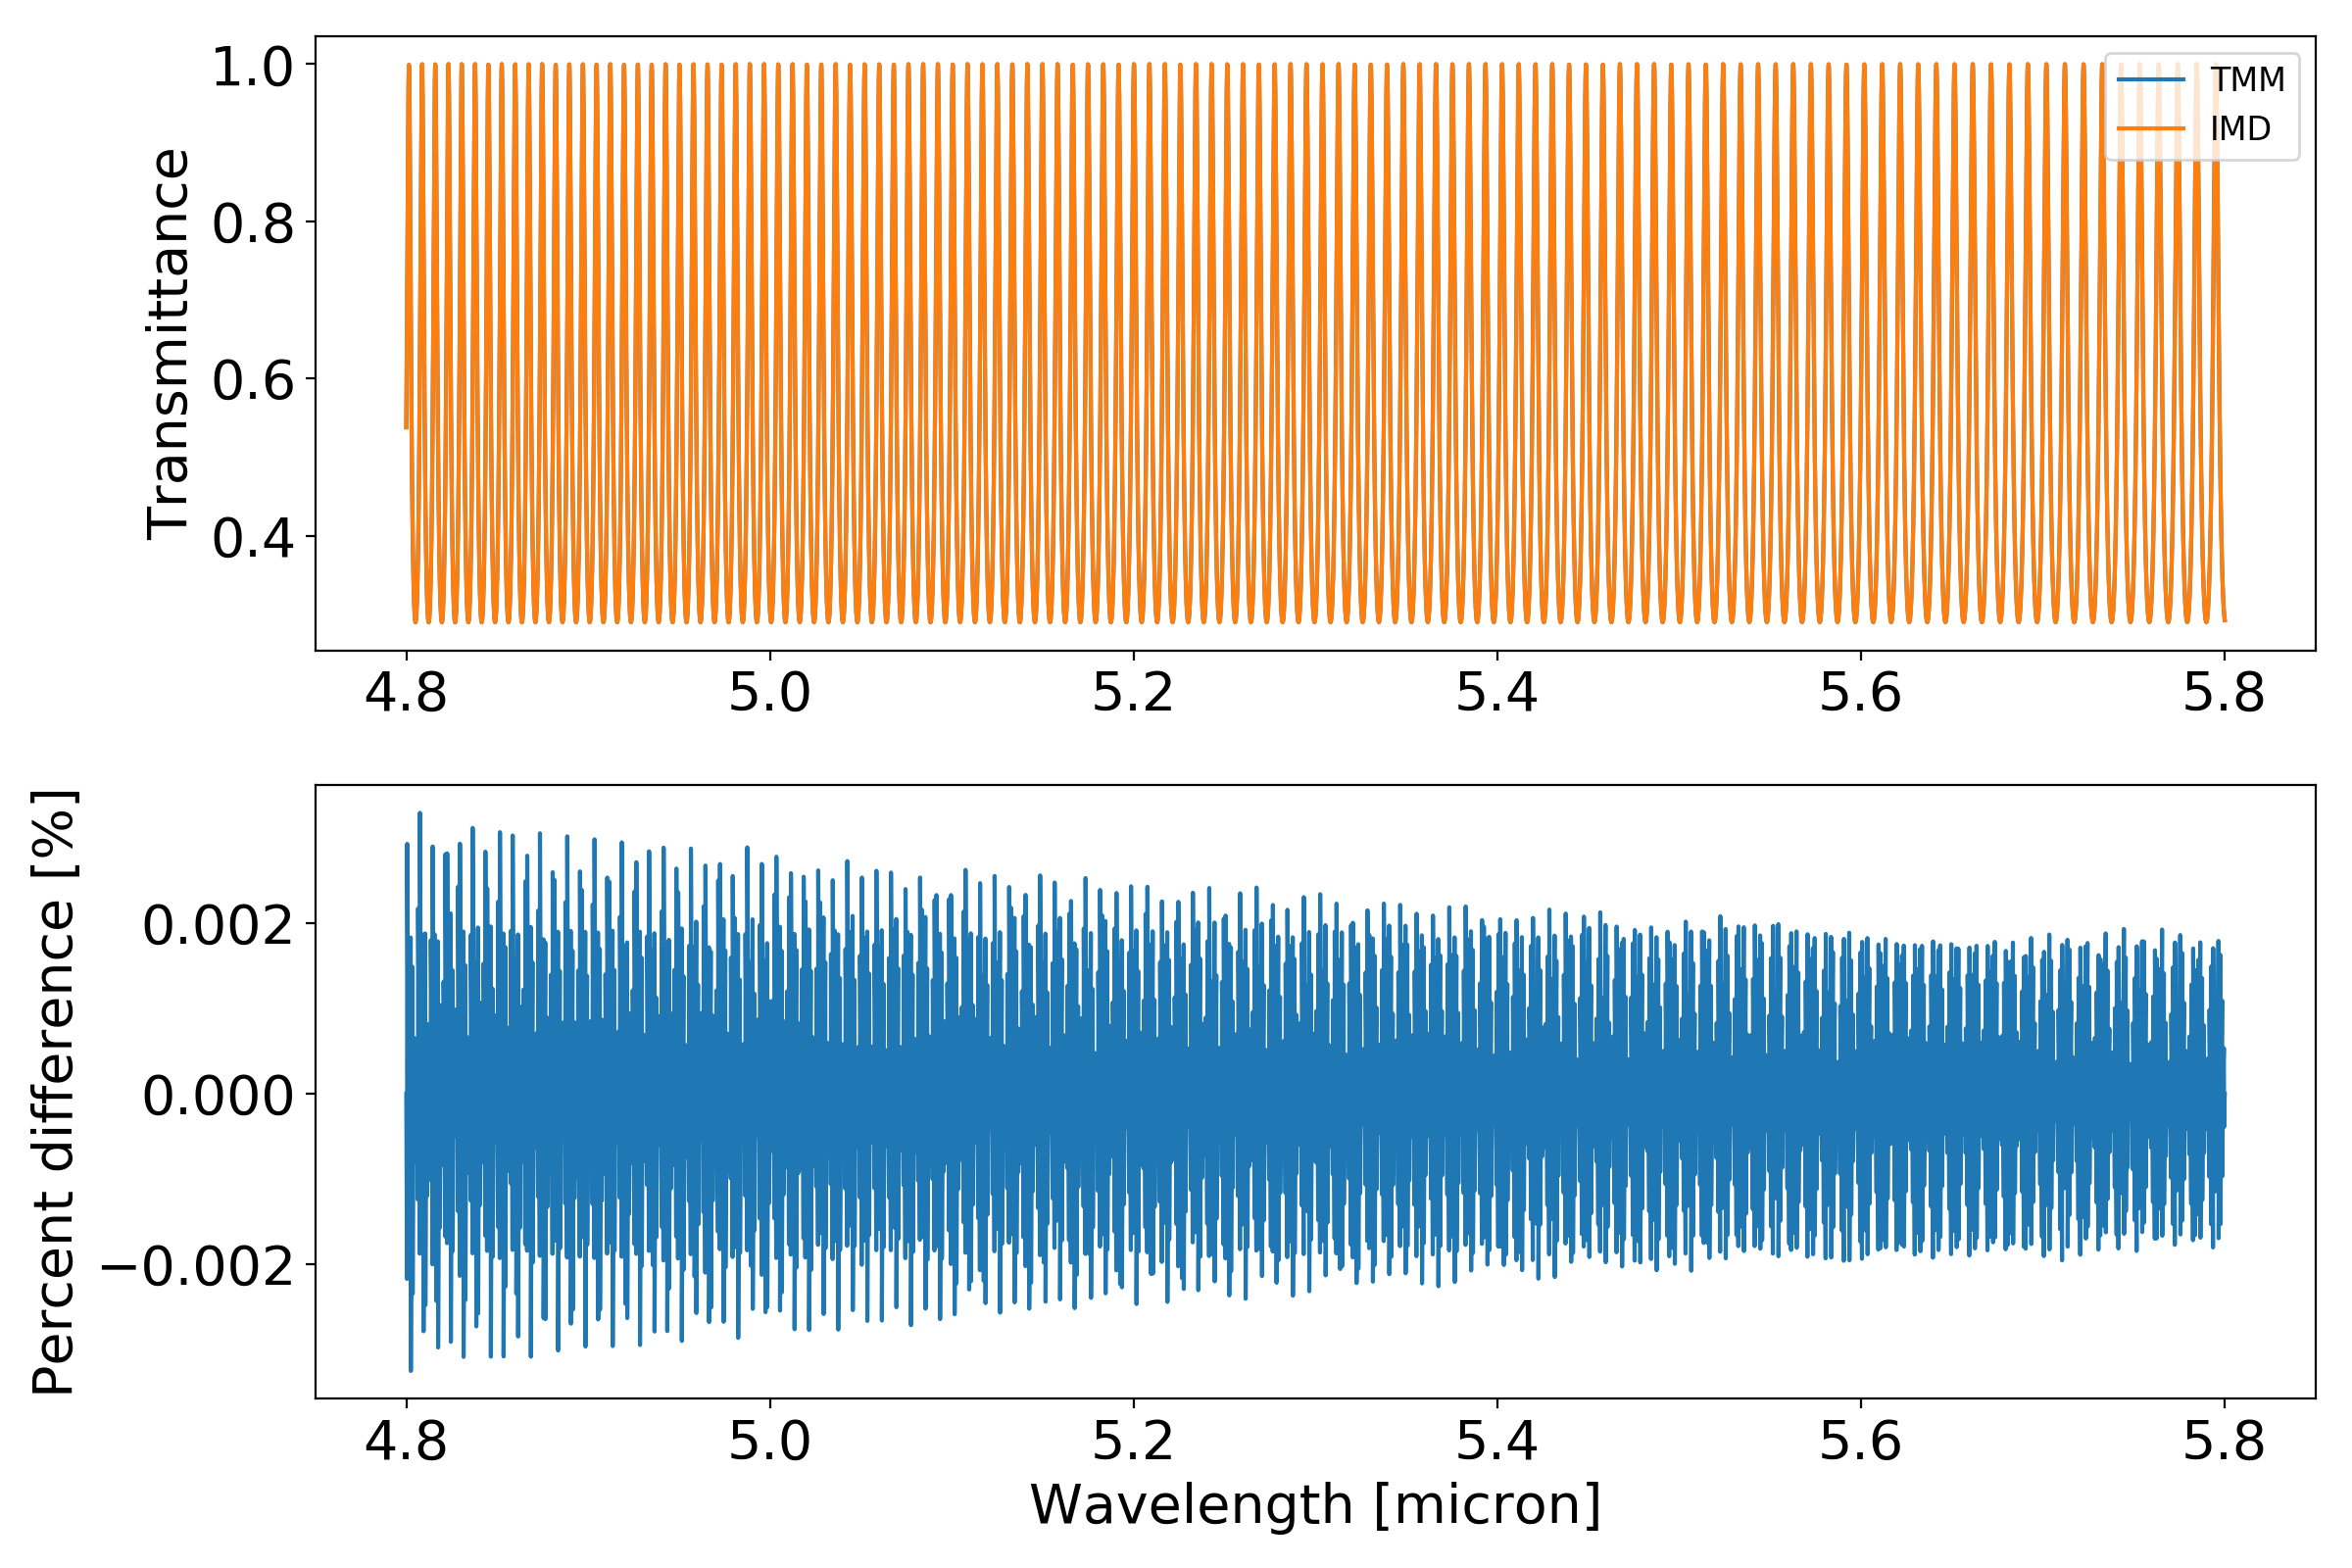

In [9]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_Si[band][i], 1] # refractive index
    d_list = [np.inf, 465e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)
    
fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Transm,label='TMM')
axs[0].plot(wav[band],T[band]['00'],label='IMD')
axs[0].set_ylabel('Transmittance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Transm-T[band]['00'])/np.array(Transm))*100.)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
The output of the Windt IMD software and the Byrnes TMM python module agree down to the 0.002% level.

### Test 2: Manual degradation of resolution via convolution with Gaussian kernel

<IPython.core.display.Javascript object>


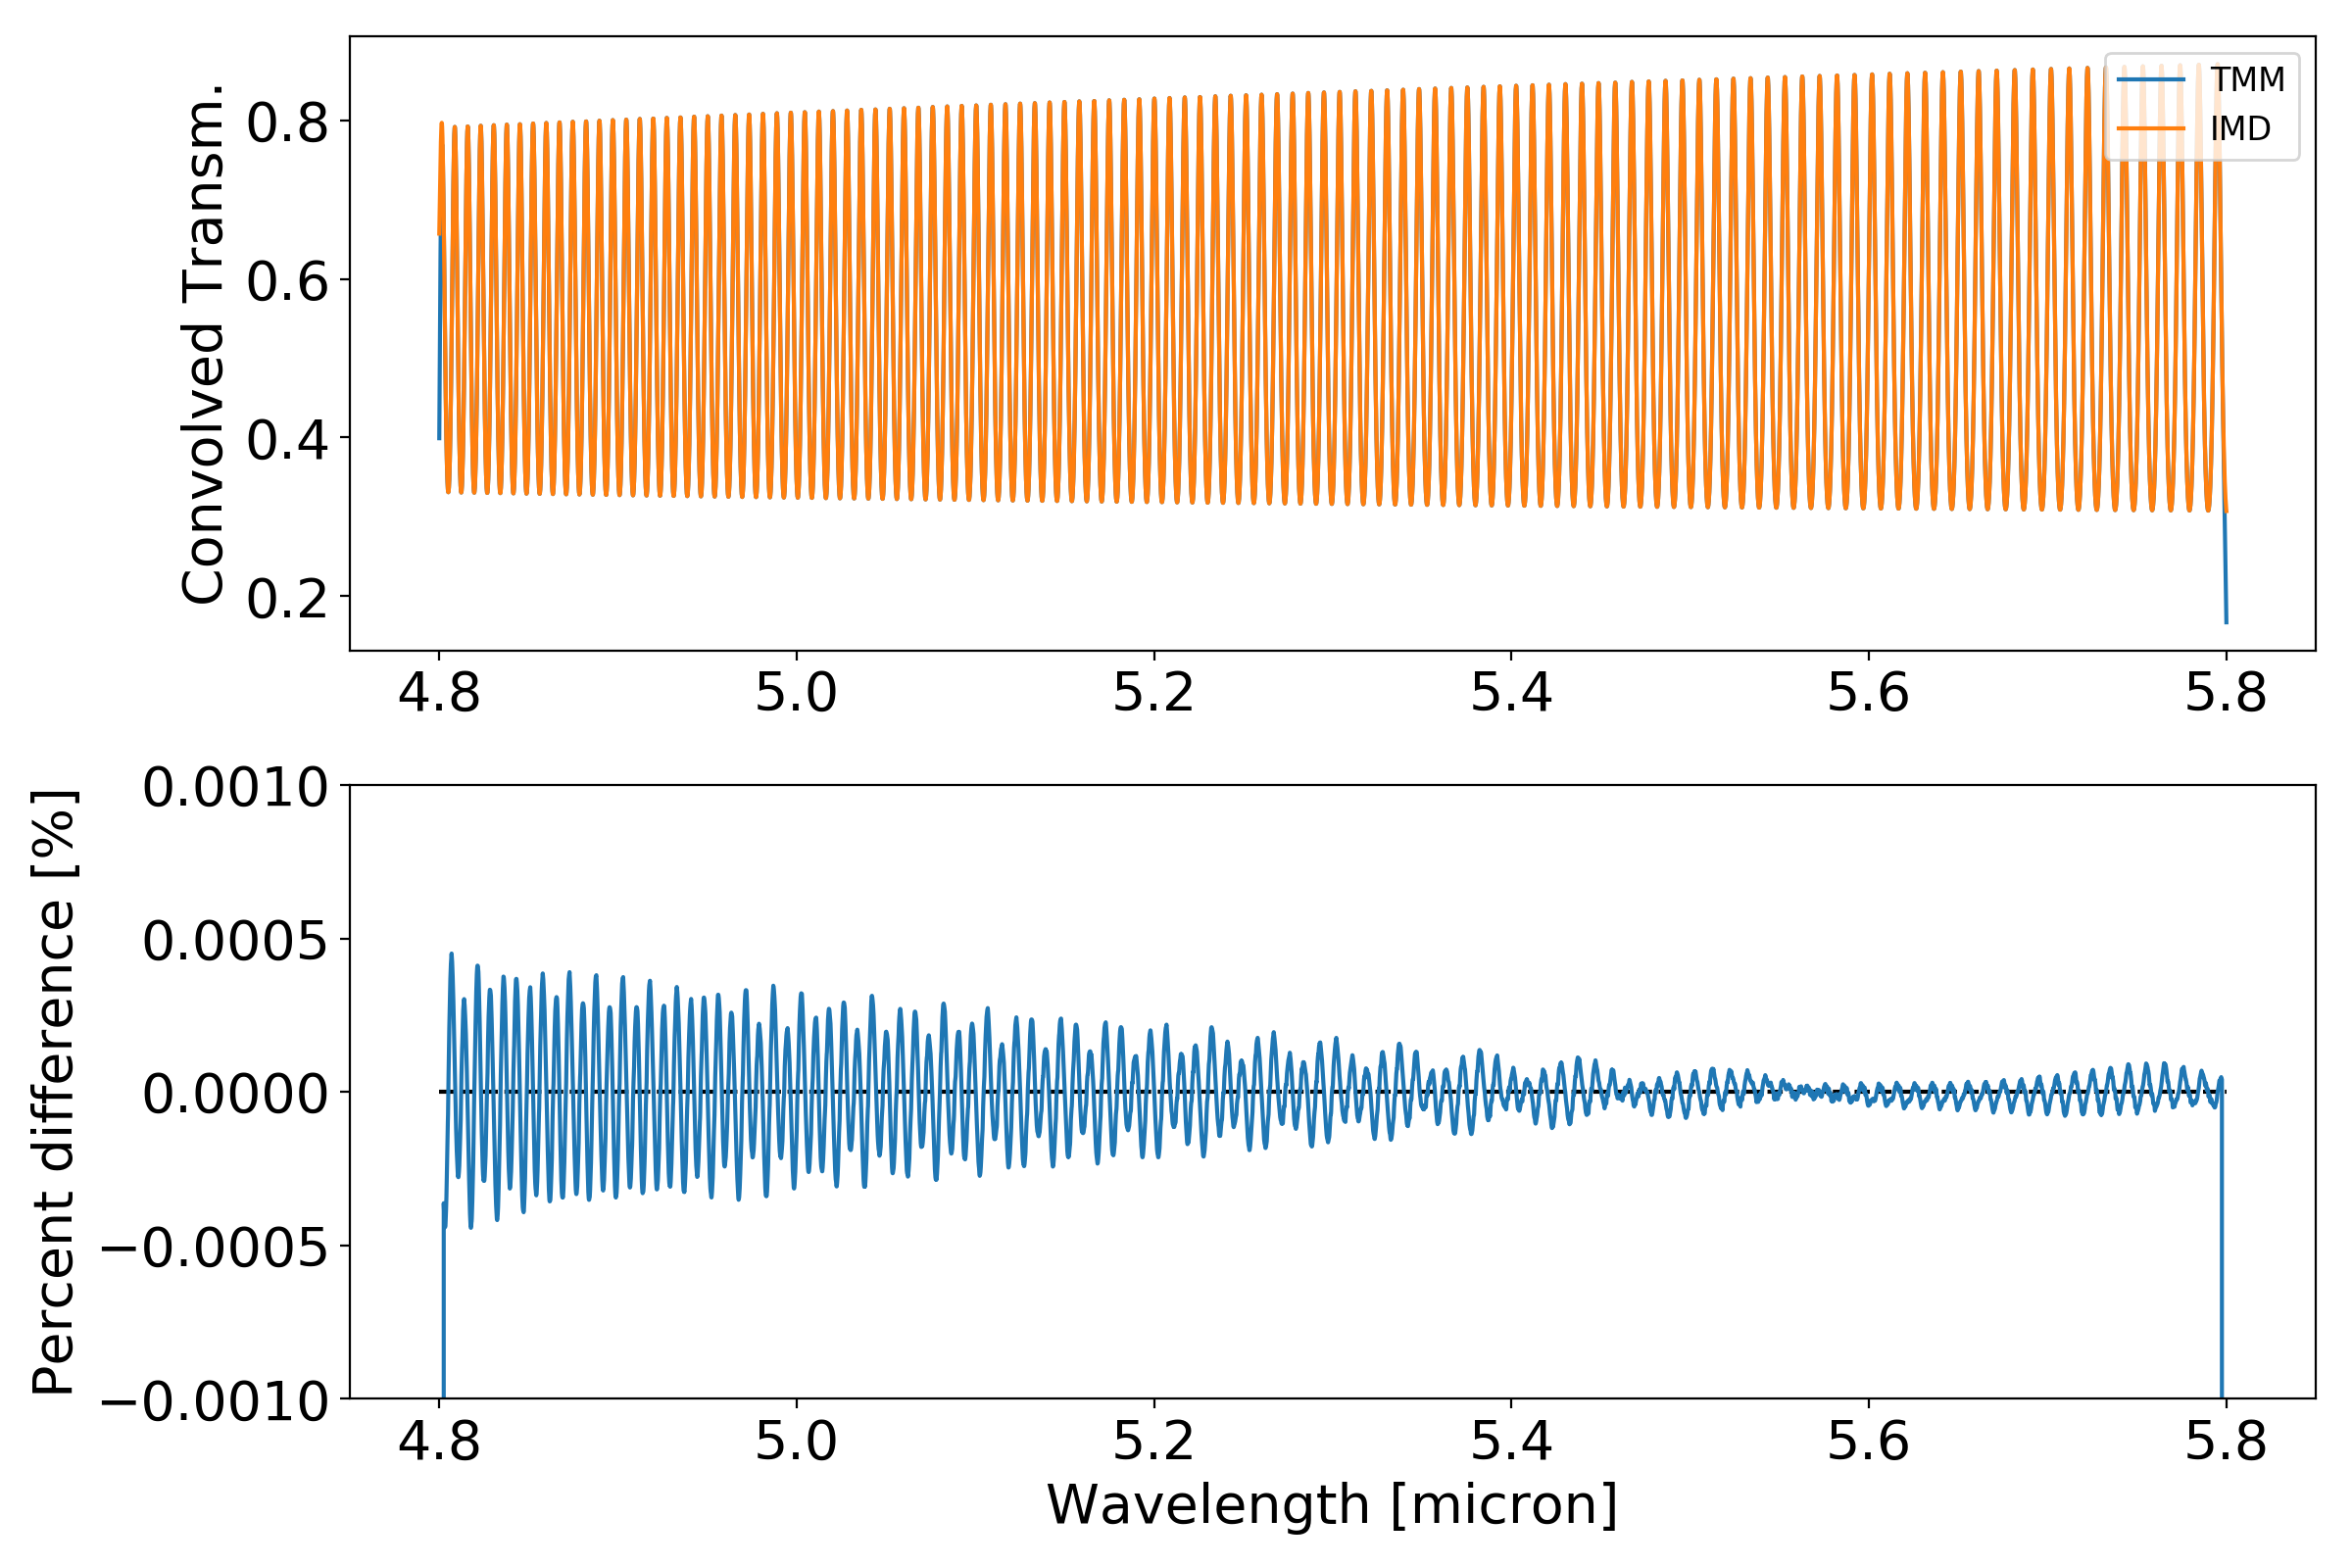

In [10]:
# simulate a finite instrumental resolution..
Delta_lambda = 0.001 # sigma, micron
convTransm = funcs.convolvegauss_windt(wav[band],Transm,Delta_lambda)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],convTransm,label='TMM')
axs[0].plot(wav[band],T[band]['01'],label='IMD')
axs[0].set_ylabel('Convolved Transm.')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((convTransm-T[band]['01'])/convTransm)*100.)
axs[1].hlines(0,wav[band].min(),wav[band].max(),'k',linestyle='dashed')
axs[1].set_ylim(-0.001,0.001)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The IDL function used by Windt to perform the spectral resolution degradation was converted into a python script/function. Though it is unclear how Windt handled the edges of the convolved output, the agreement in-between the edges is very good.

### Test 3: Compare results for single arsenic-doped silicon layer (photon extinction via absorption by active layer)

<IPython.core.display.Javascript object>


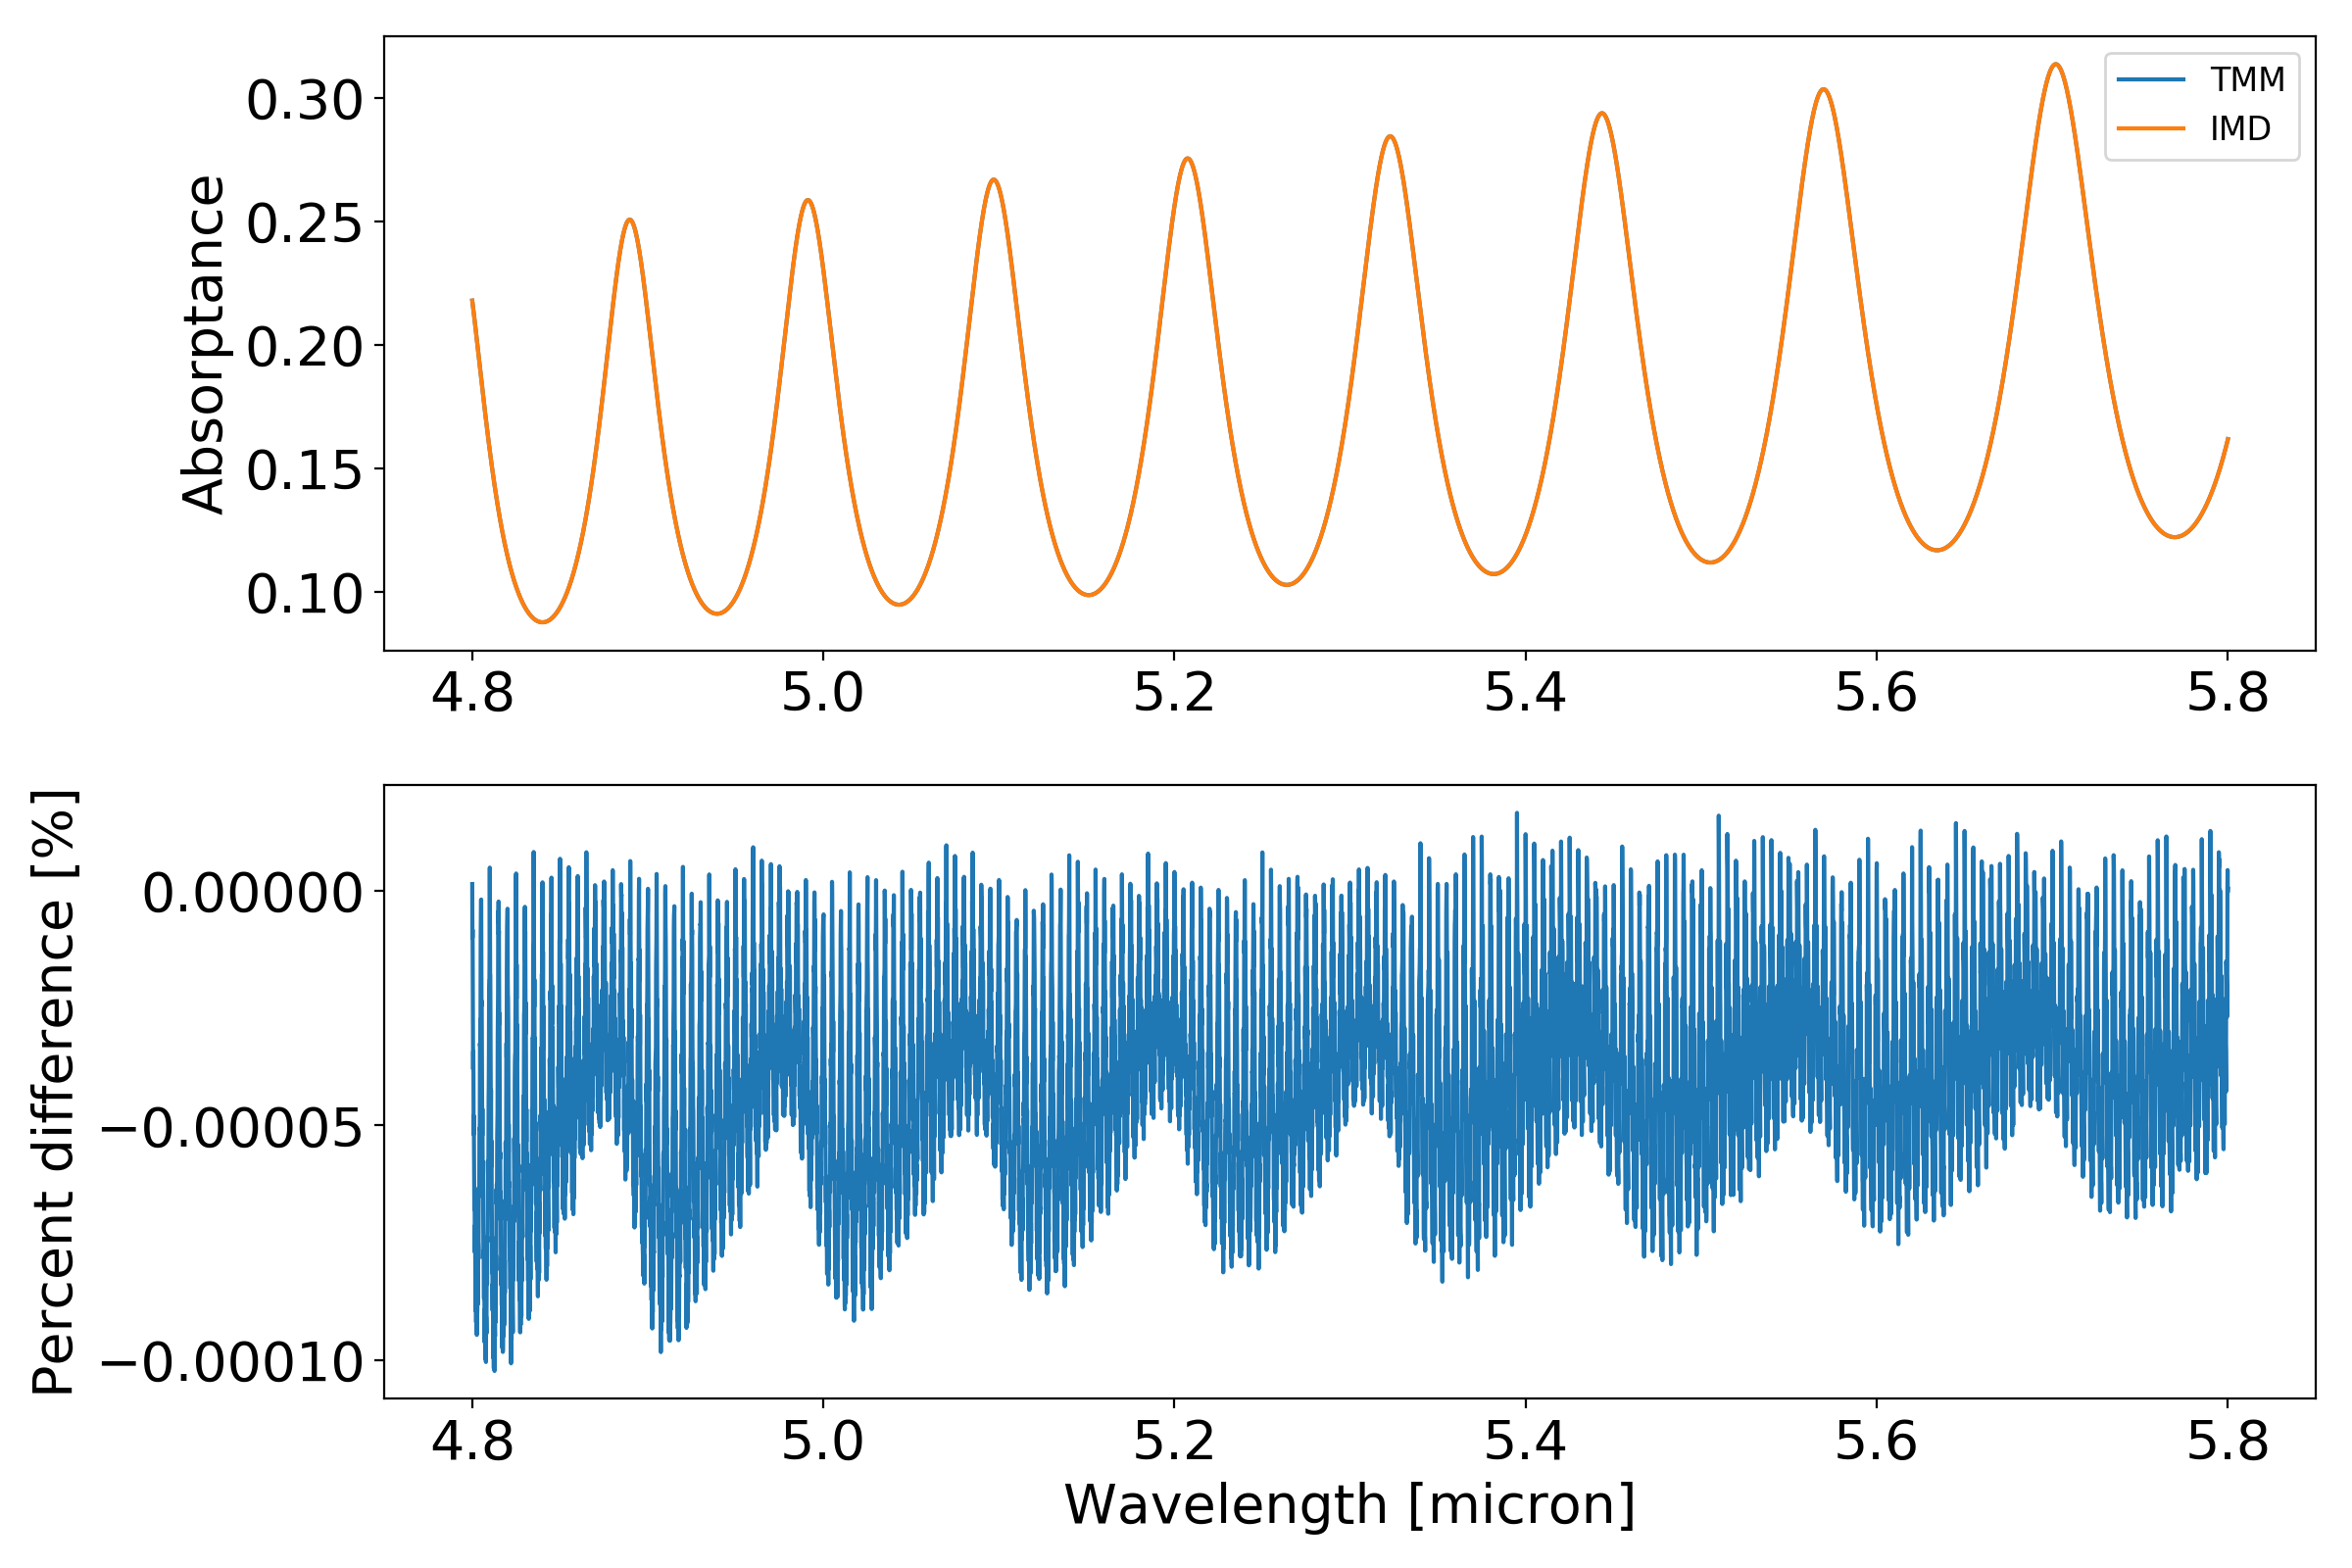

In [13]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['20'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['20'])/Absorp)*100.)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Test 4: Compare results for single zinc sulphide layer

<IPython.core.display.Javascript object>


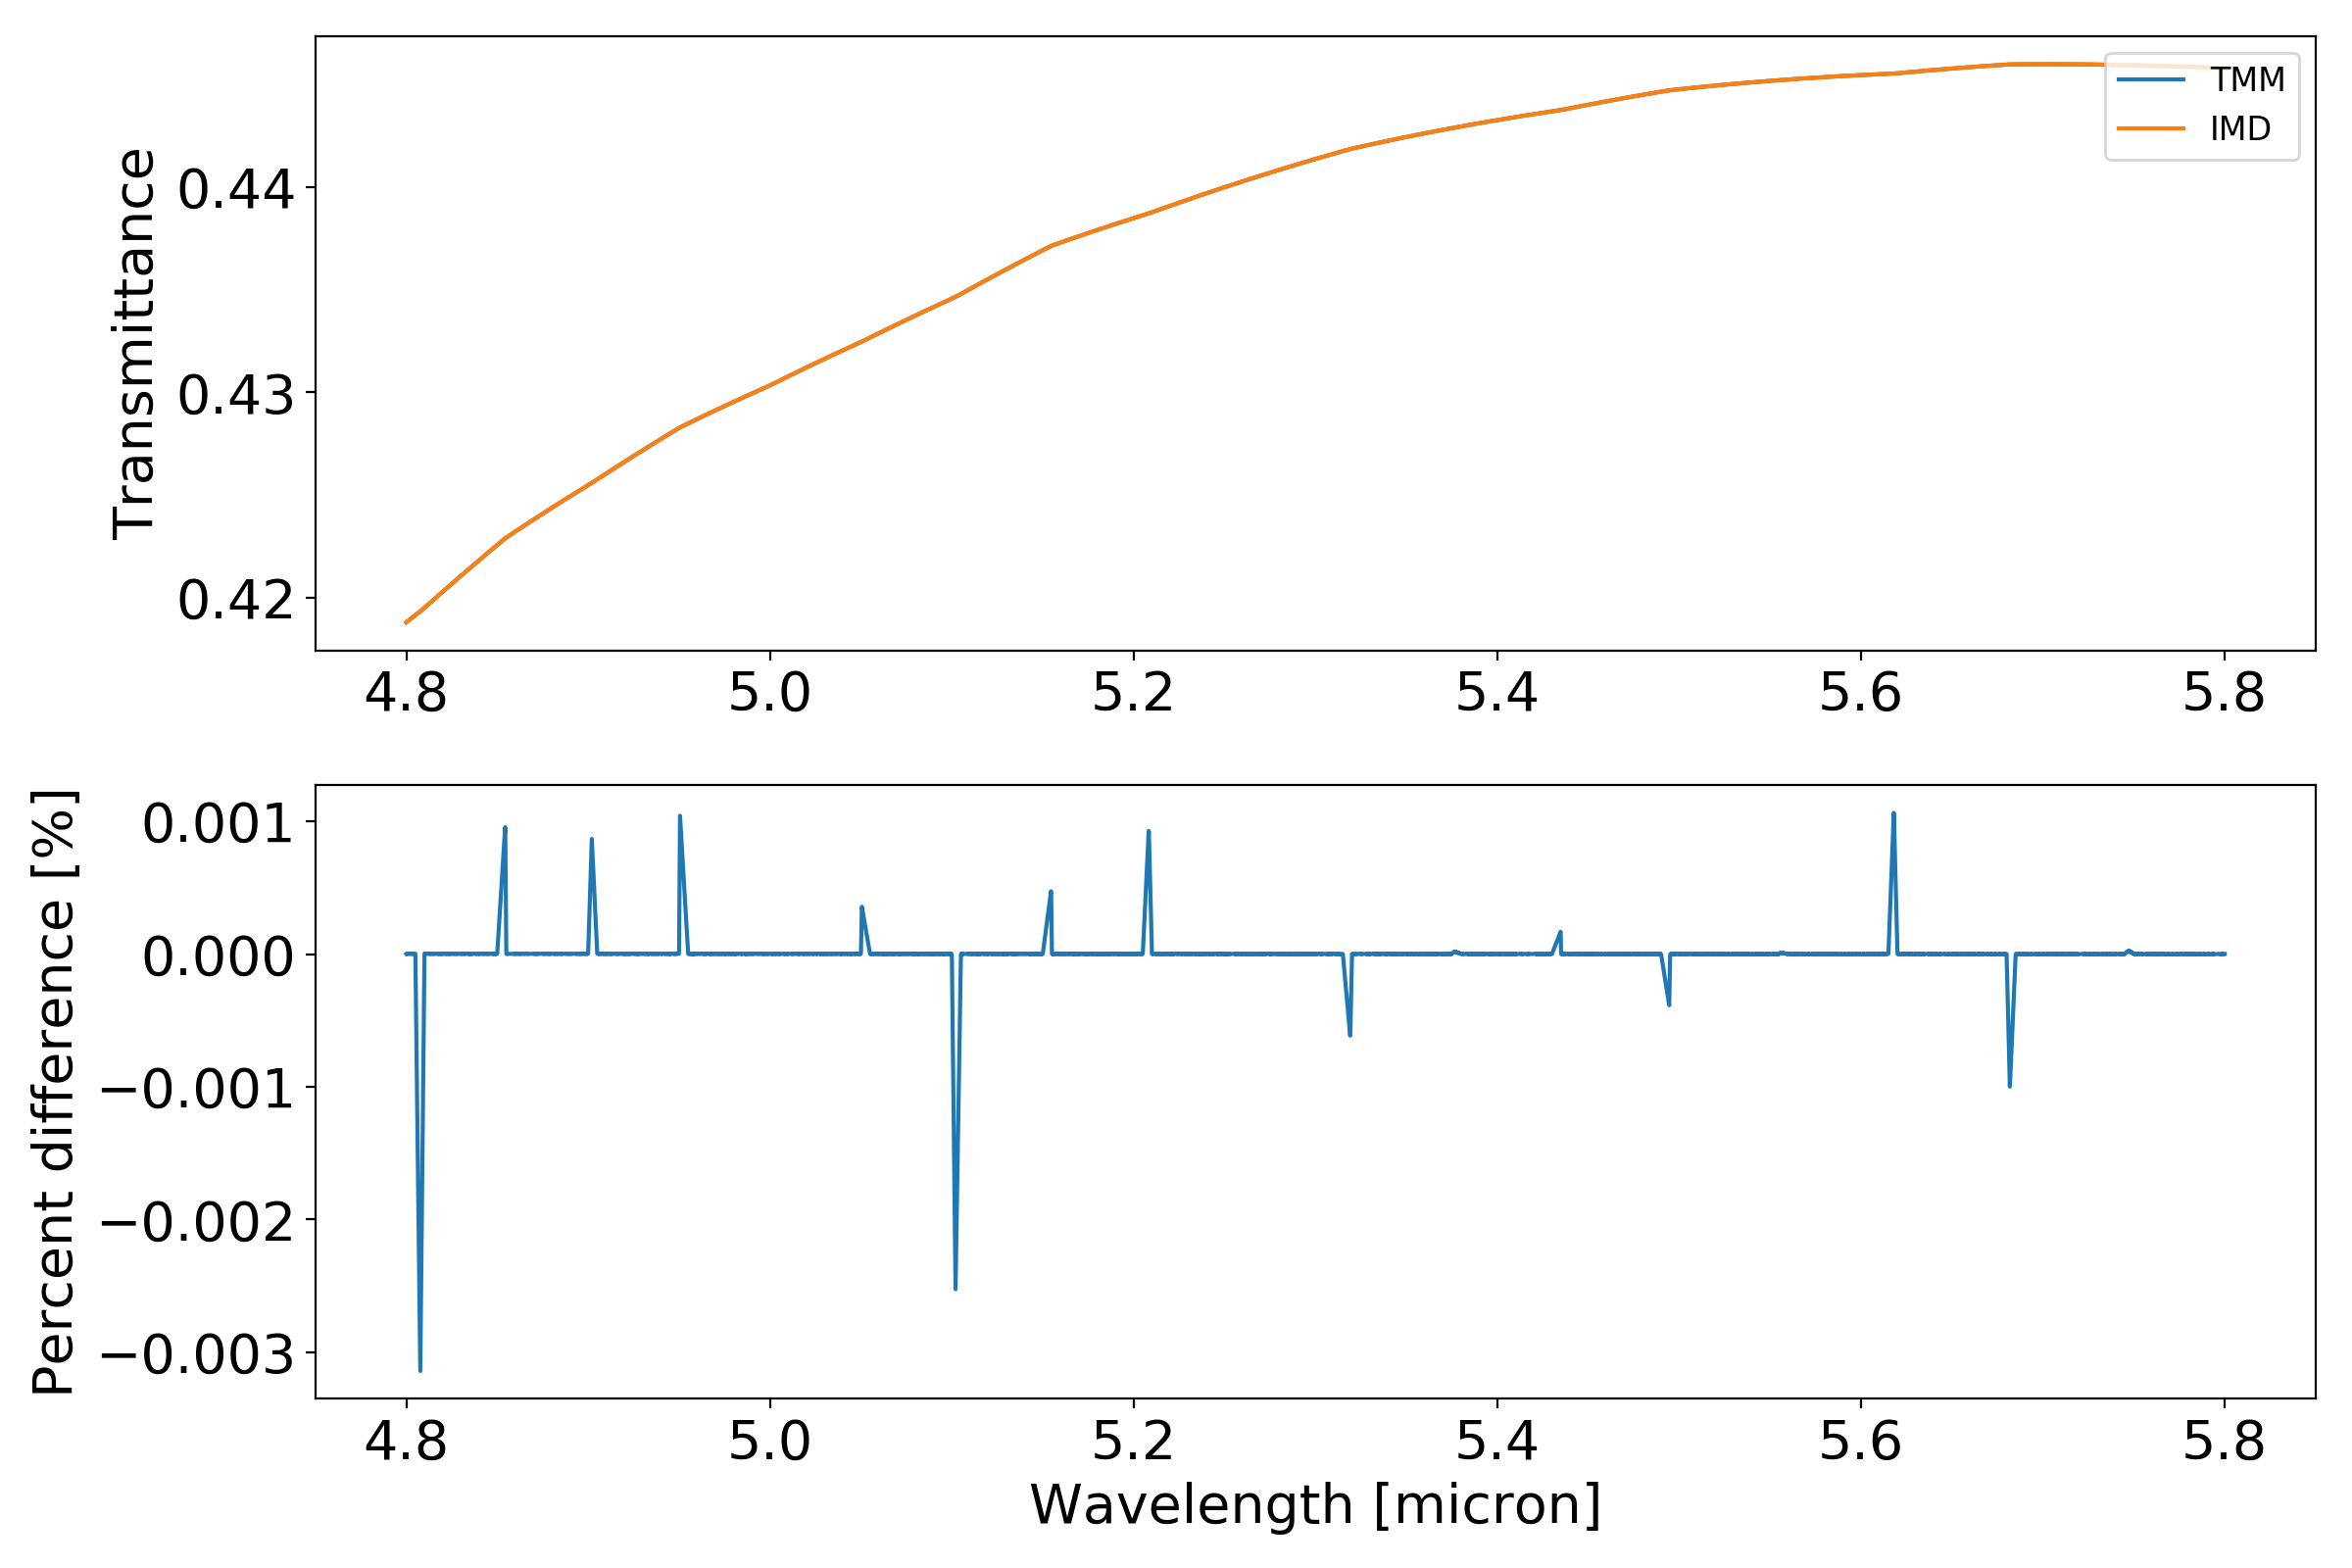

In [14]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Refl,label='TMM')
axs[0].plot(wav[band],R[band]['50'],label='IMD')
axs[0].set_ylabel('Transmittance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Transm-T[band]['50'])/Transm)*100.)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The absorptance values determined by the IMD and TMM codes agree with each other.

### Test 4: Compare results for Si substrate on Si:As layer

<IPython.core.display.Javascript object>


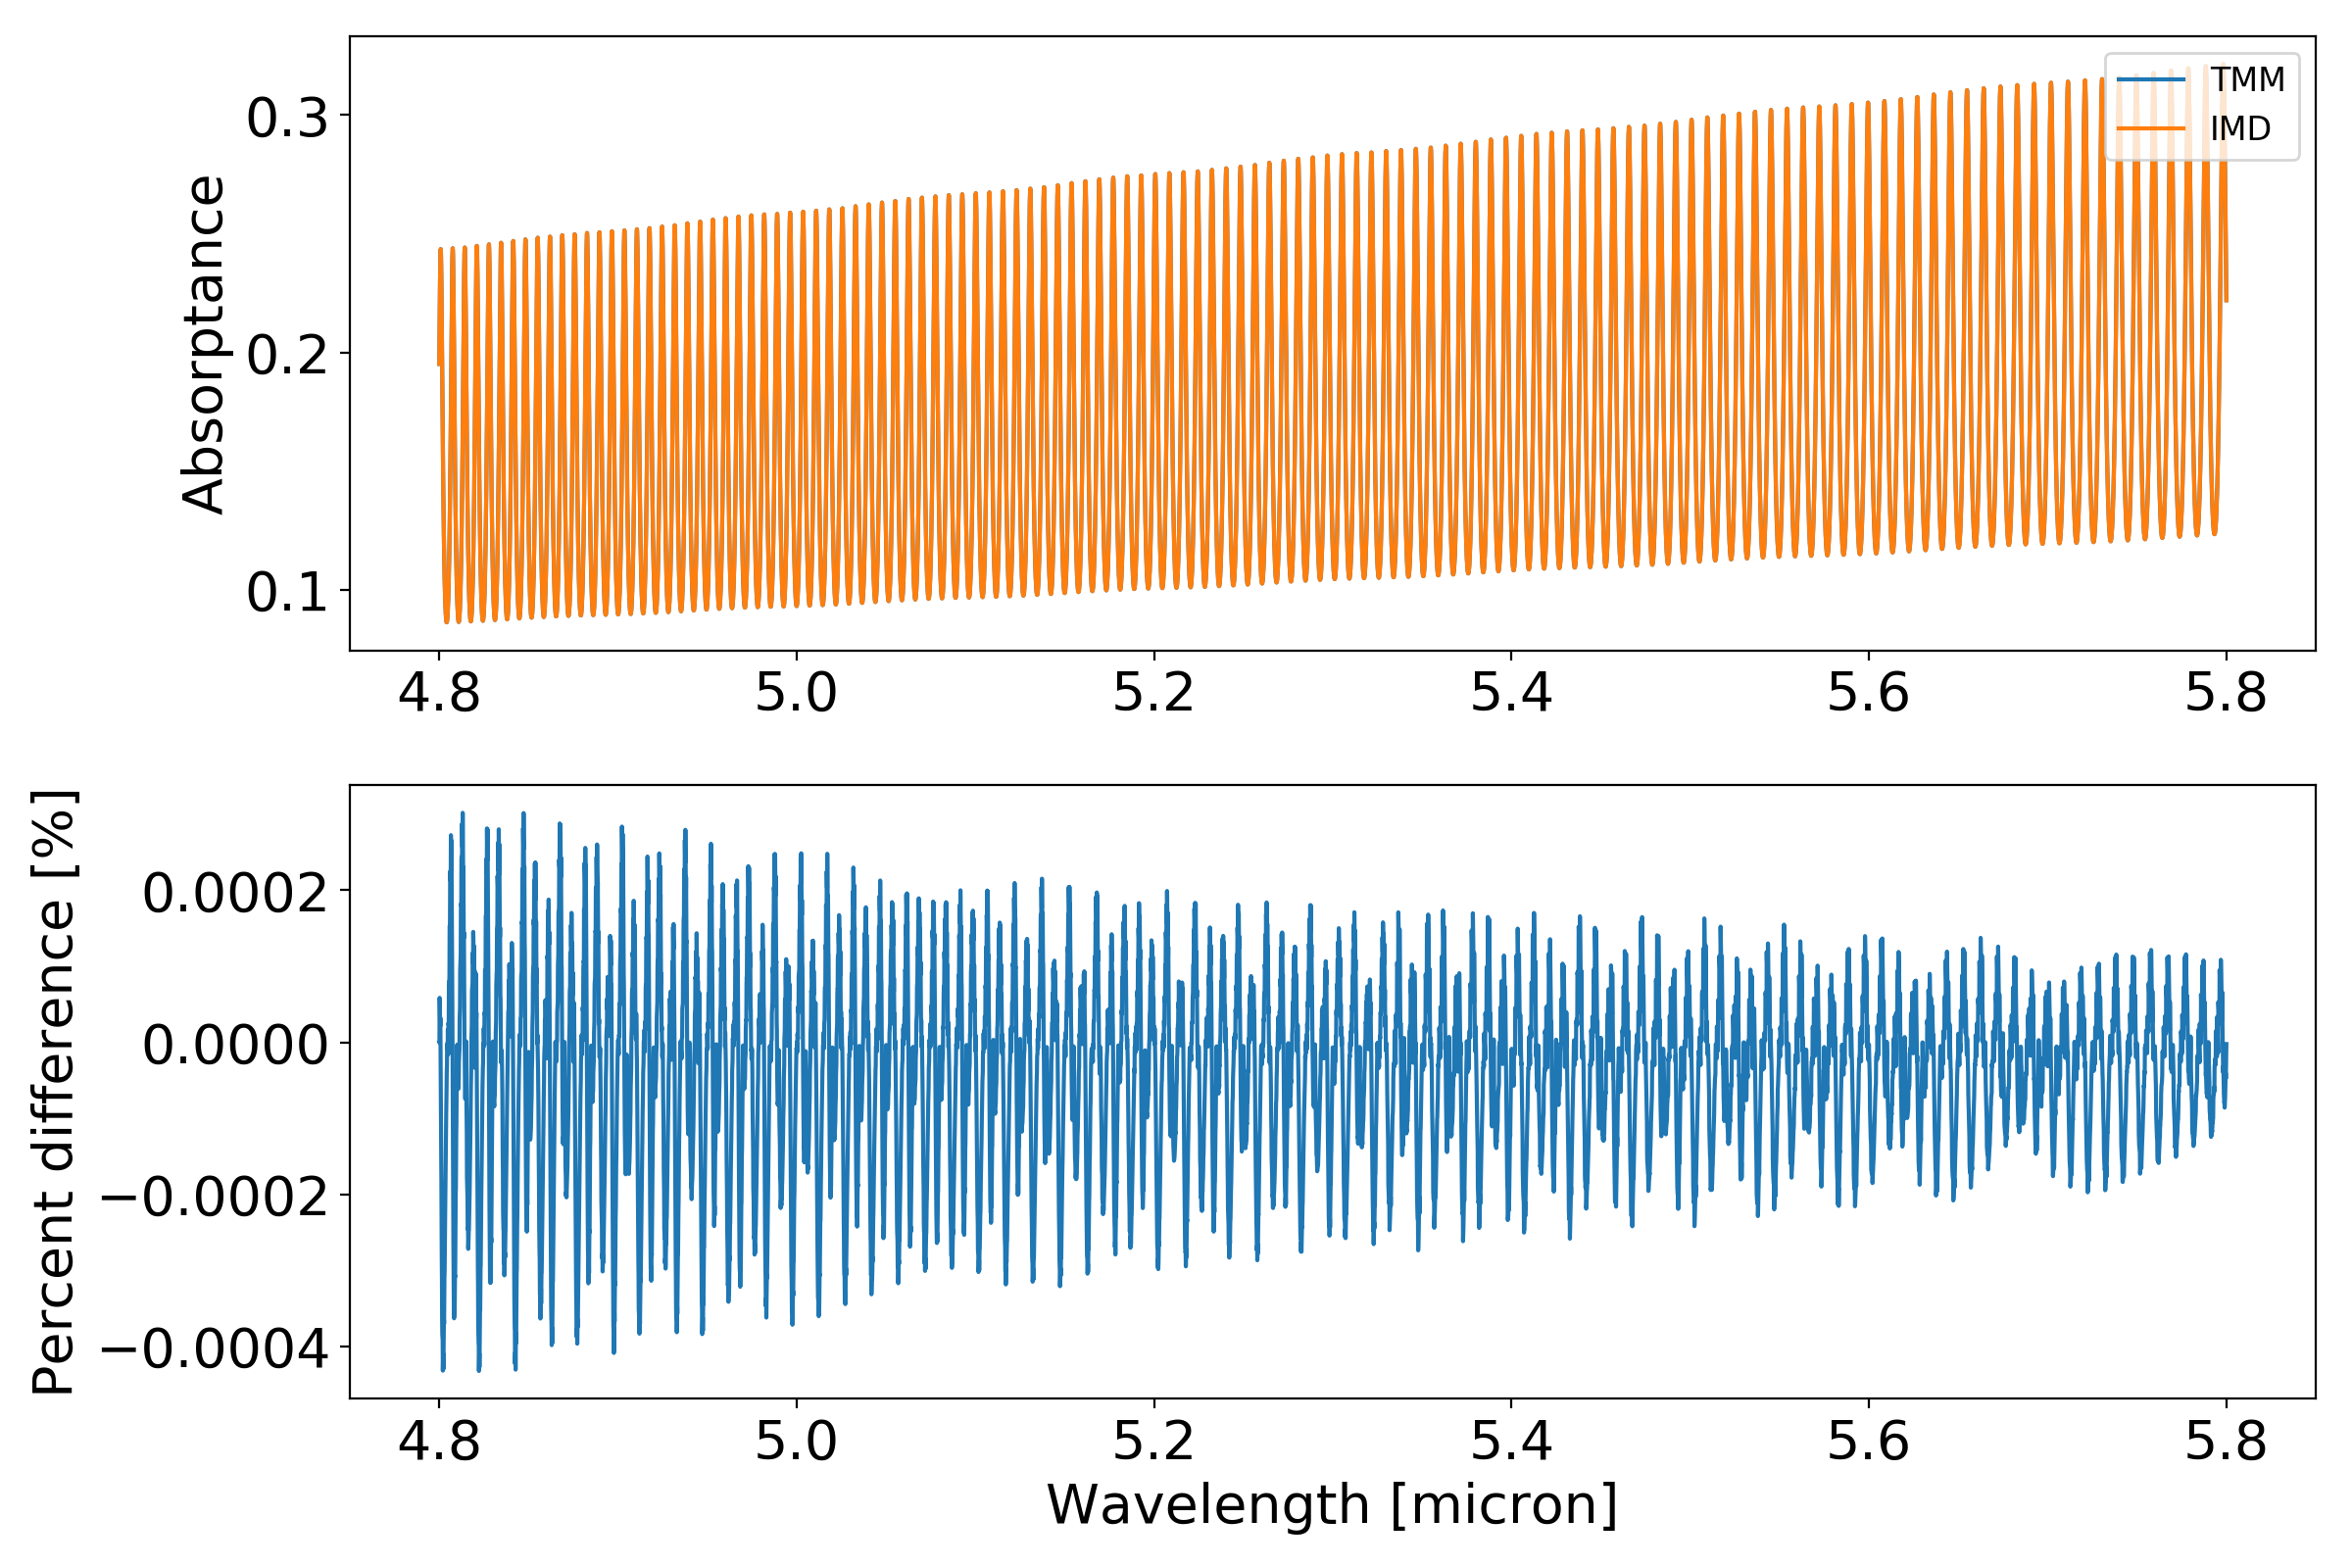

In [15]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['30'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['30'])/Absorp)*100.)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The outputs determined by the IMD and TMM codes agree with each other.

### Test 5: Compare results for ZnS layer on Si substrate on Si:As layer

<IPython.core.display.Javascript object>


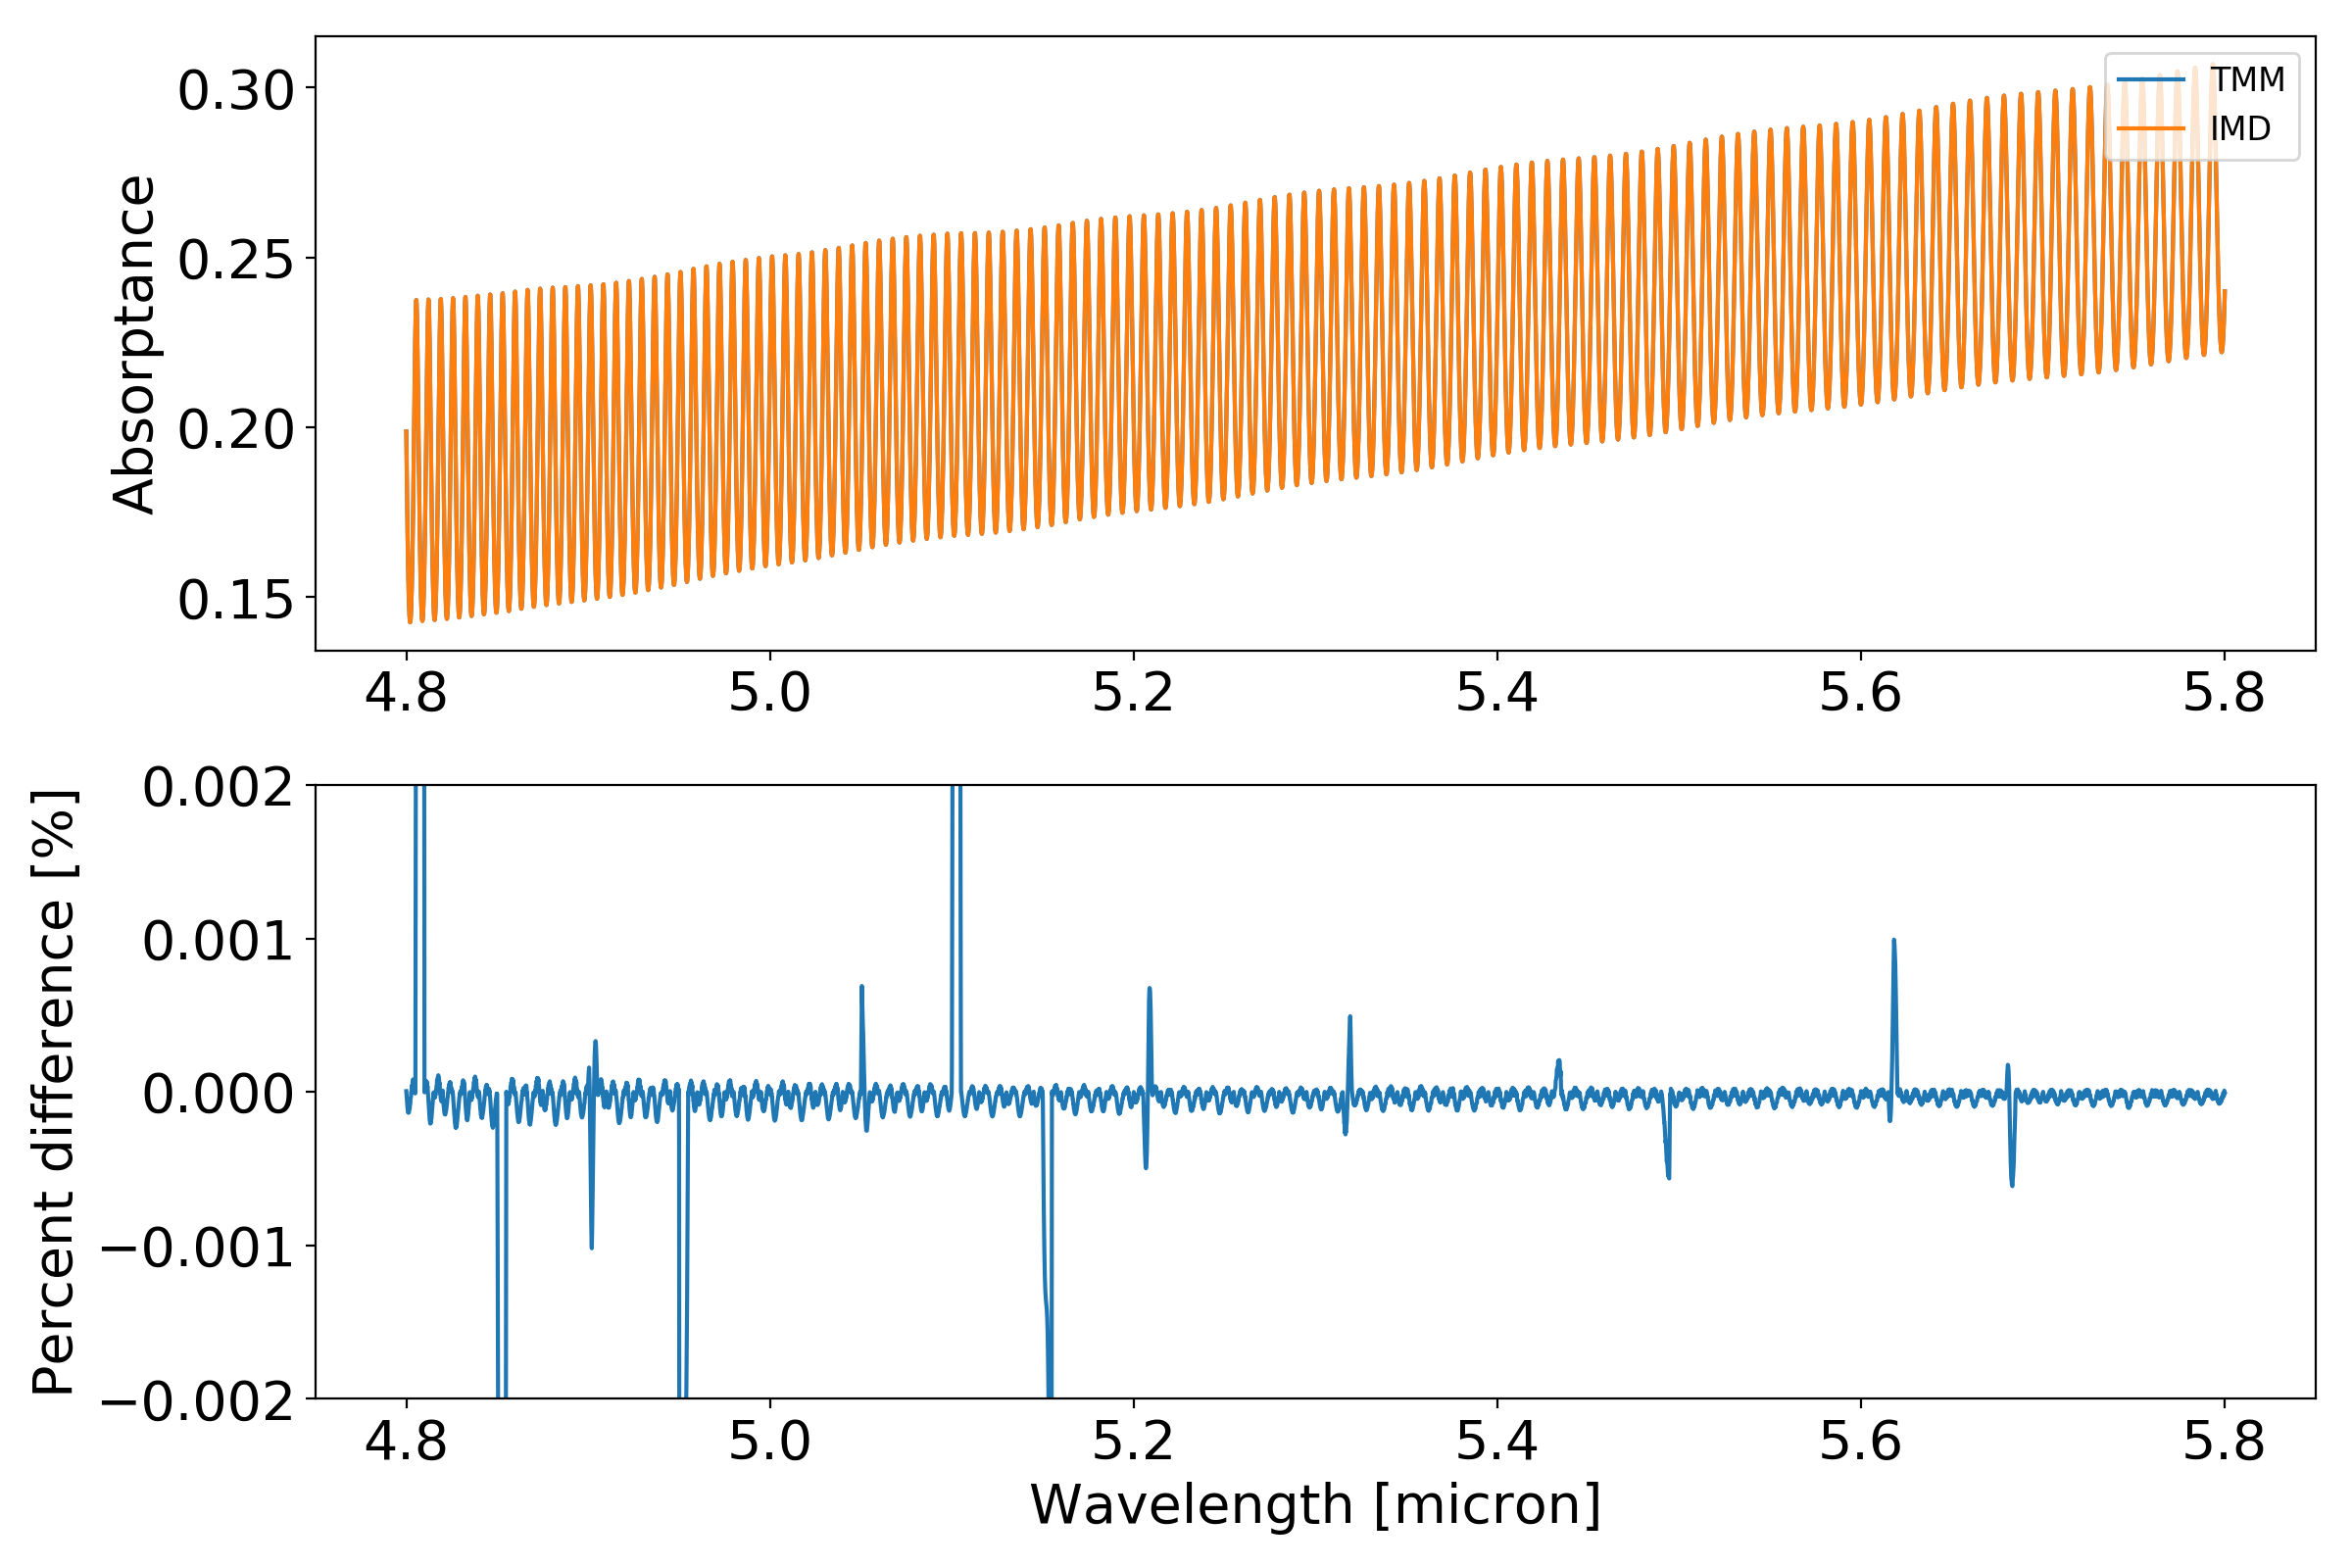

In [19]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['40'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['40'])/Absorp)*100.)
axs[1].set_ylim(-0.002,0.002)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The outputs determined by the IMD and TMM codes agree with each other.

### Test 6: Compare results for different incidence angles (setup: ZnS layer on Si substrate on Si:As layer)

<IPython.core.display.Javascript object>


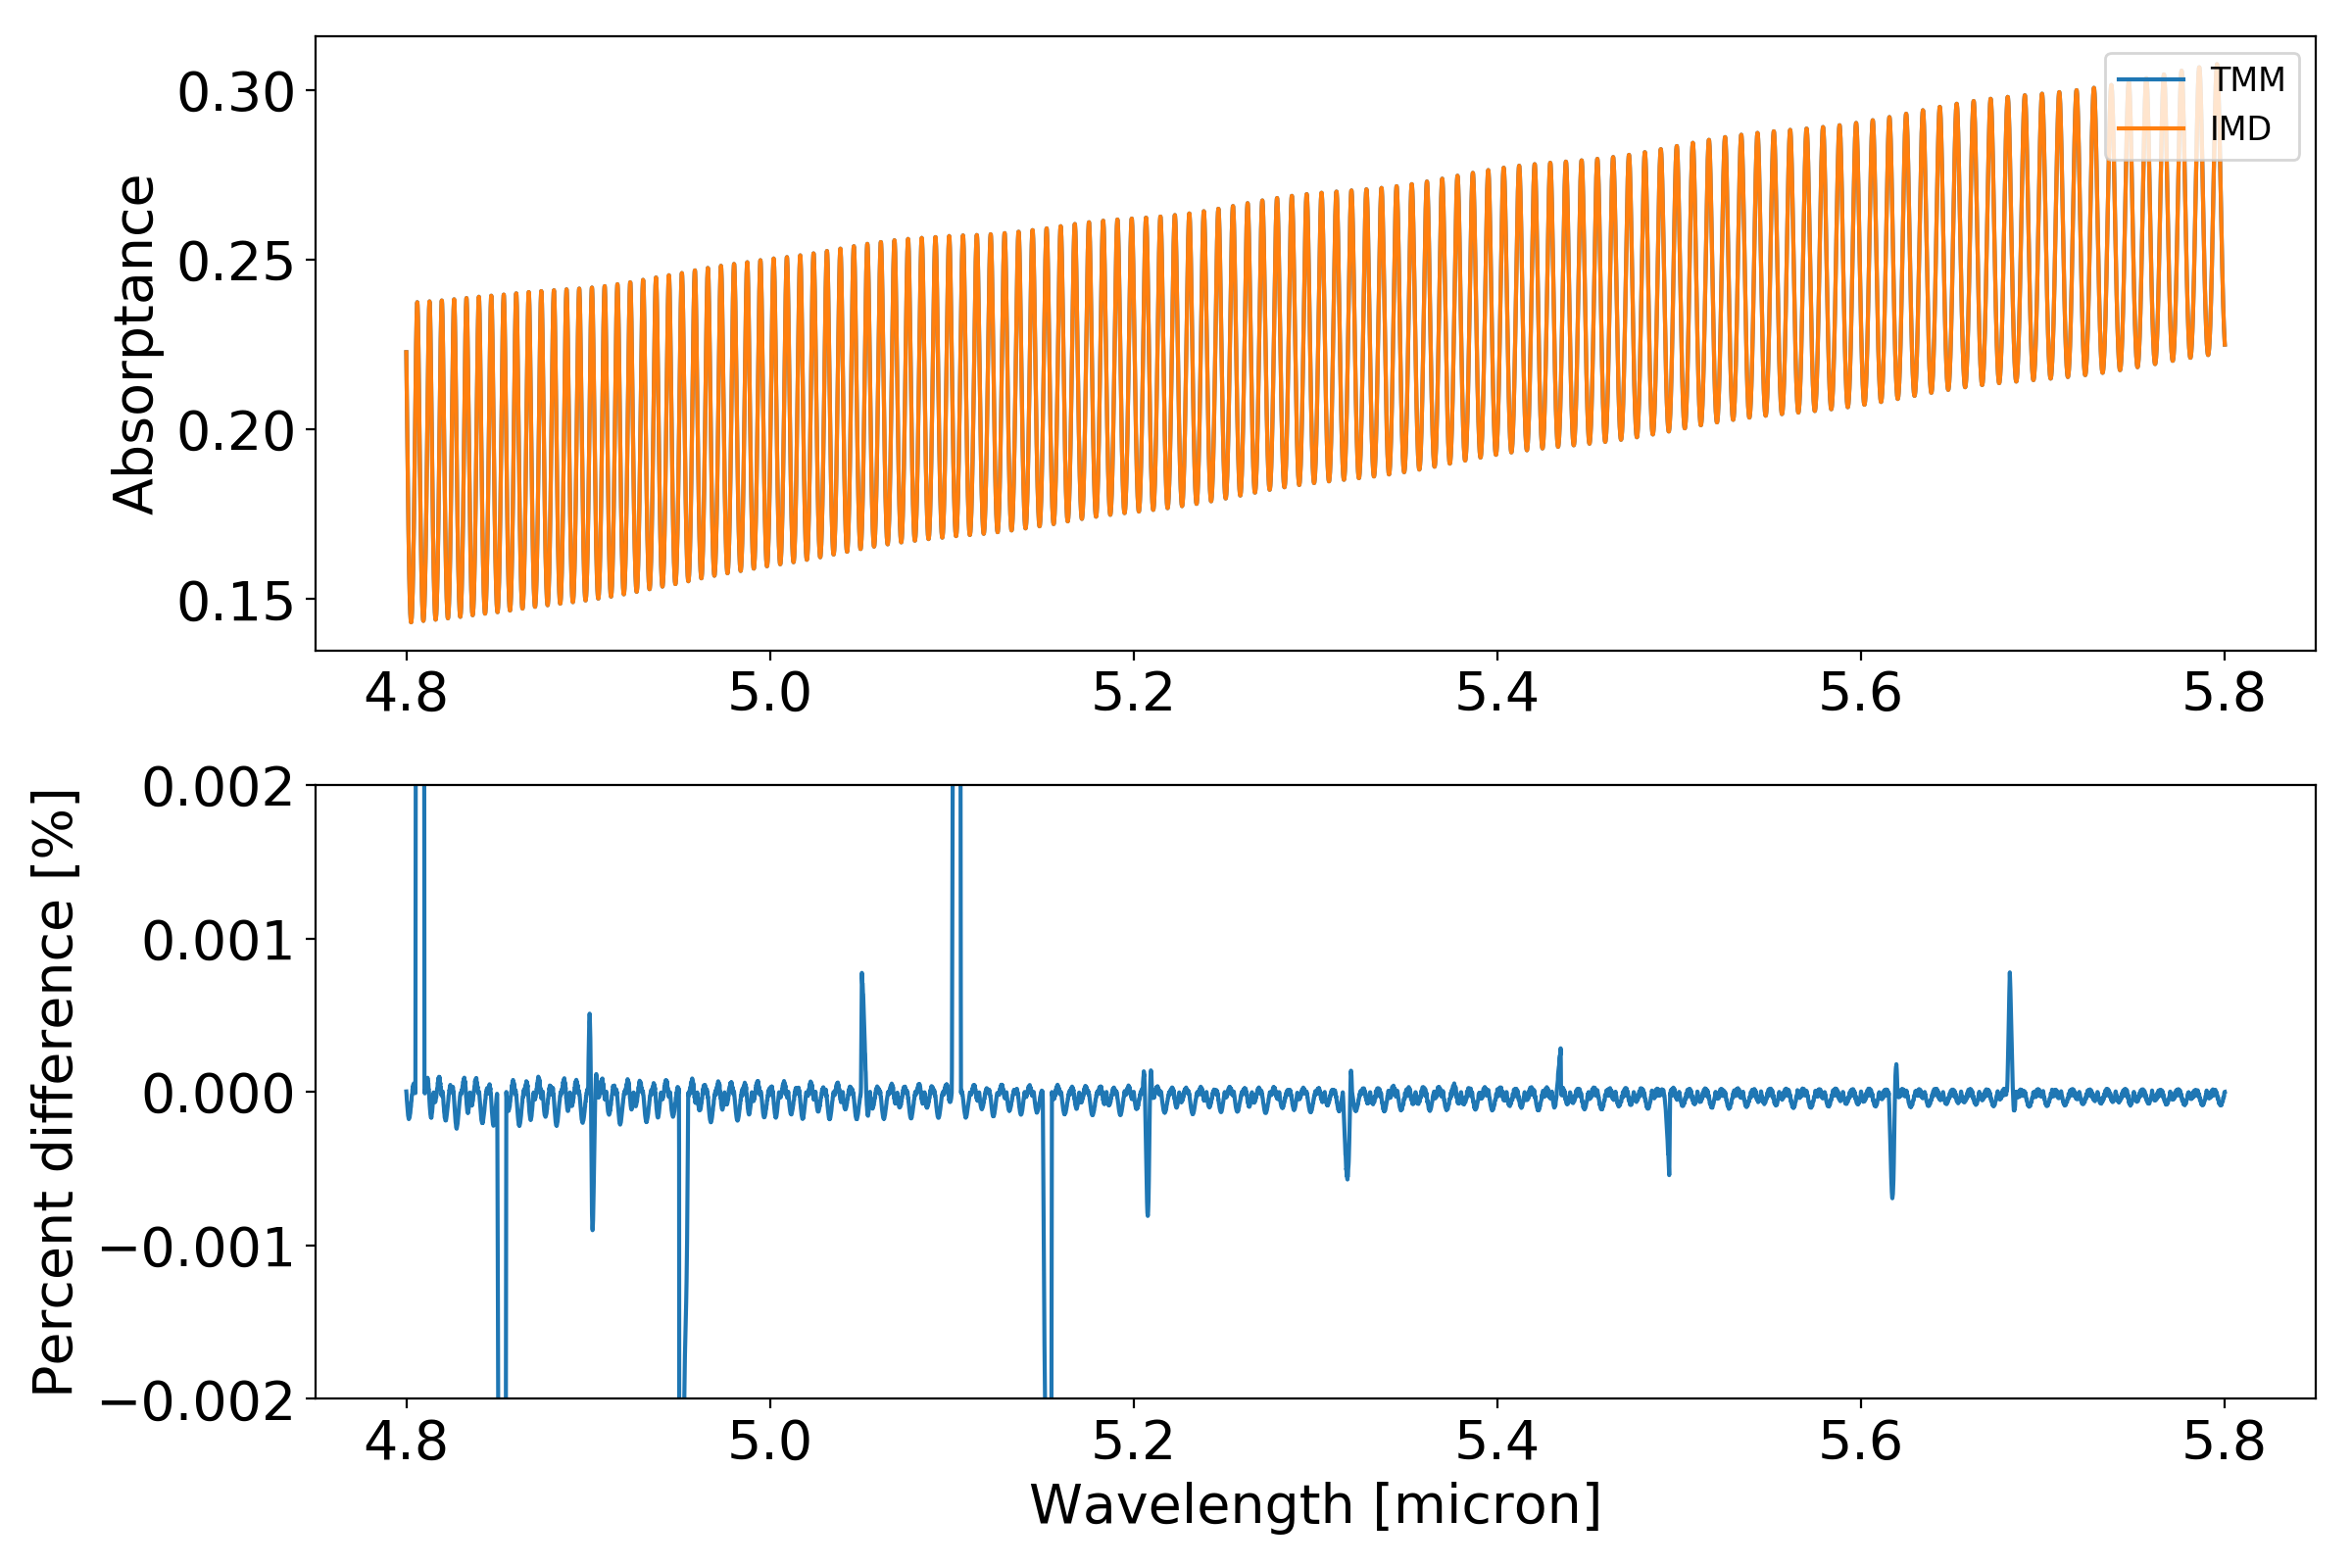

In [20]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 10*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['60'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['60'])/Absorp)*100.)
axs[1].set_ylim(-0.002,0.002)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The outputs determined by the IMD and TMM codes agree with each other.

### Test 7: Compare results for different roughness/diffusiveness factors (setup: ZnS layer on Si substrate on Si:As layer)

<IPython.core.display.Javascript object>


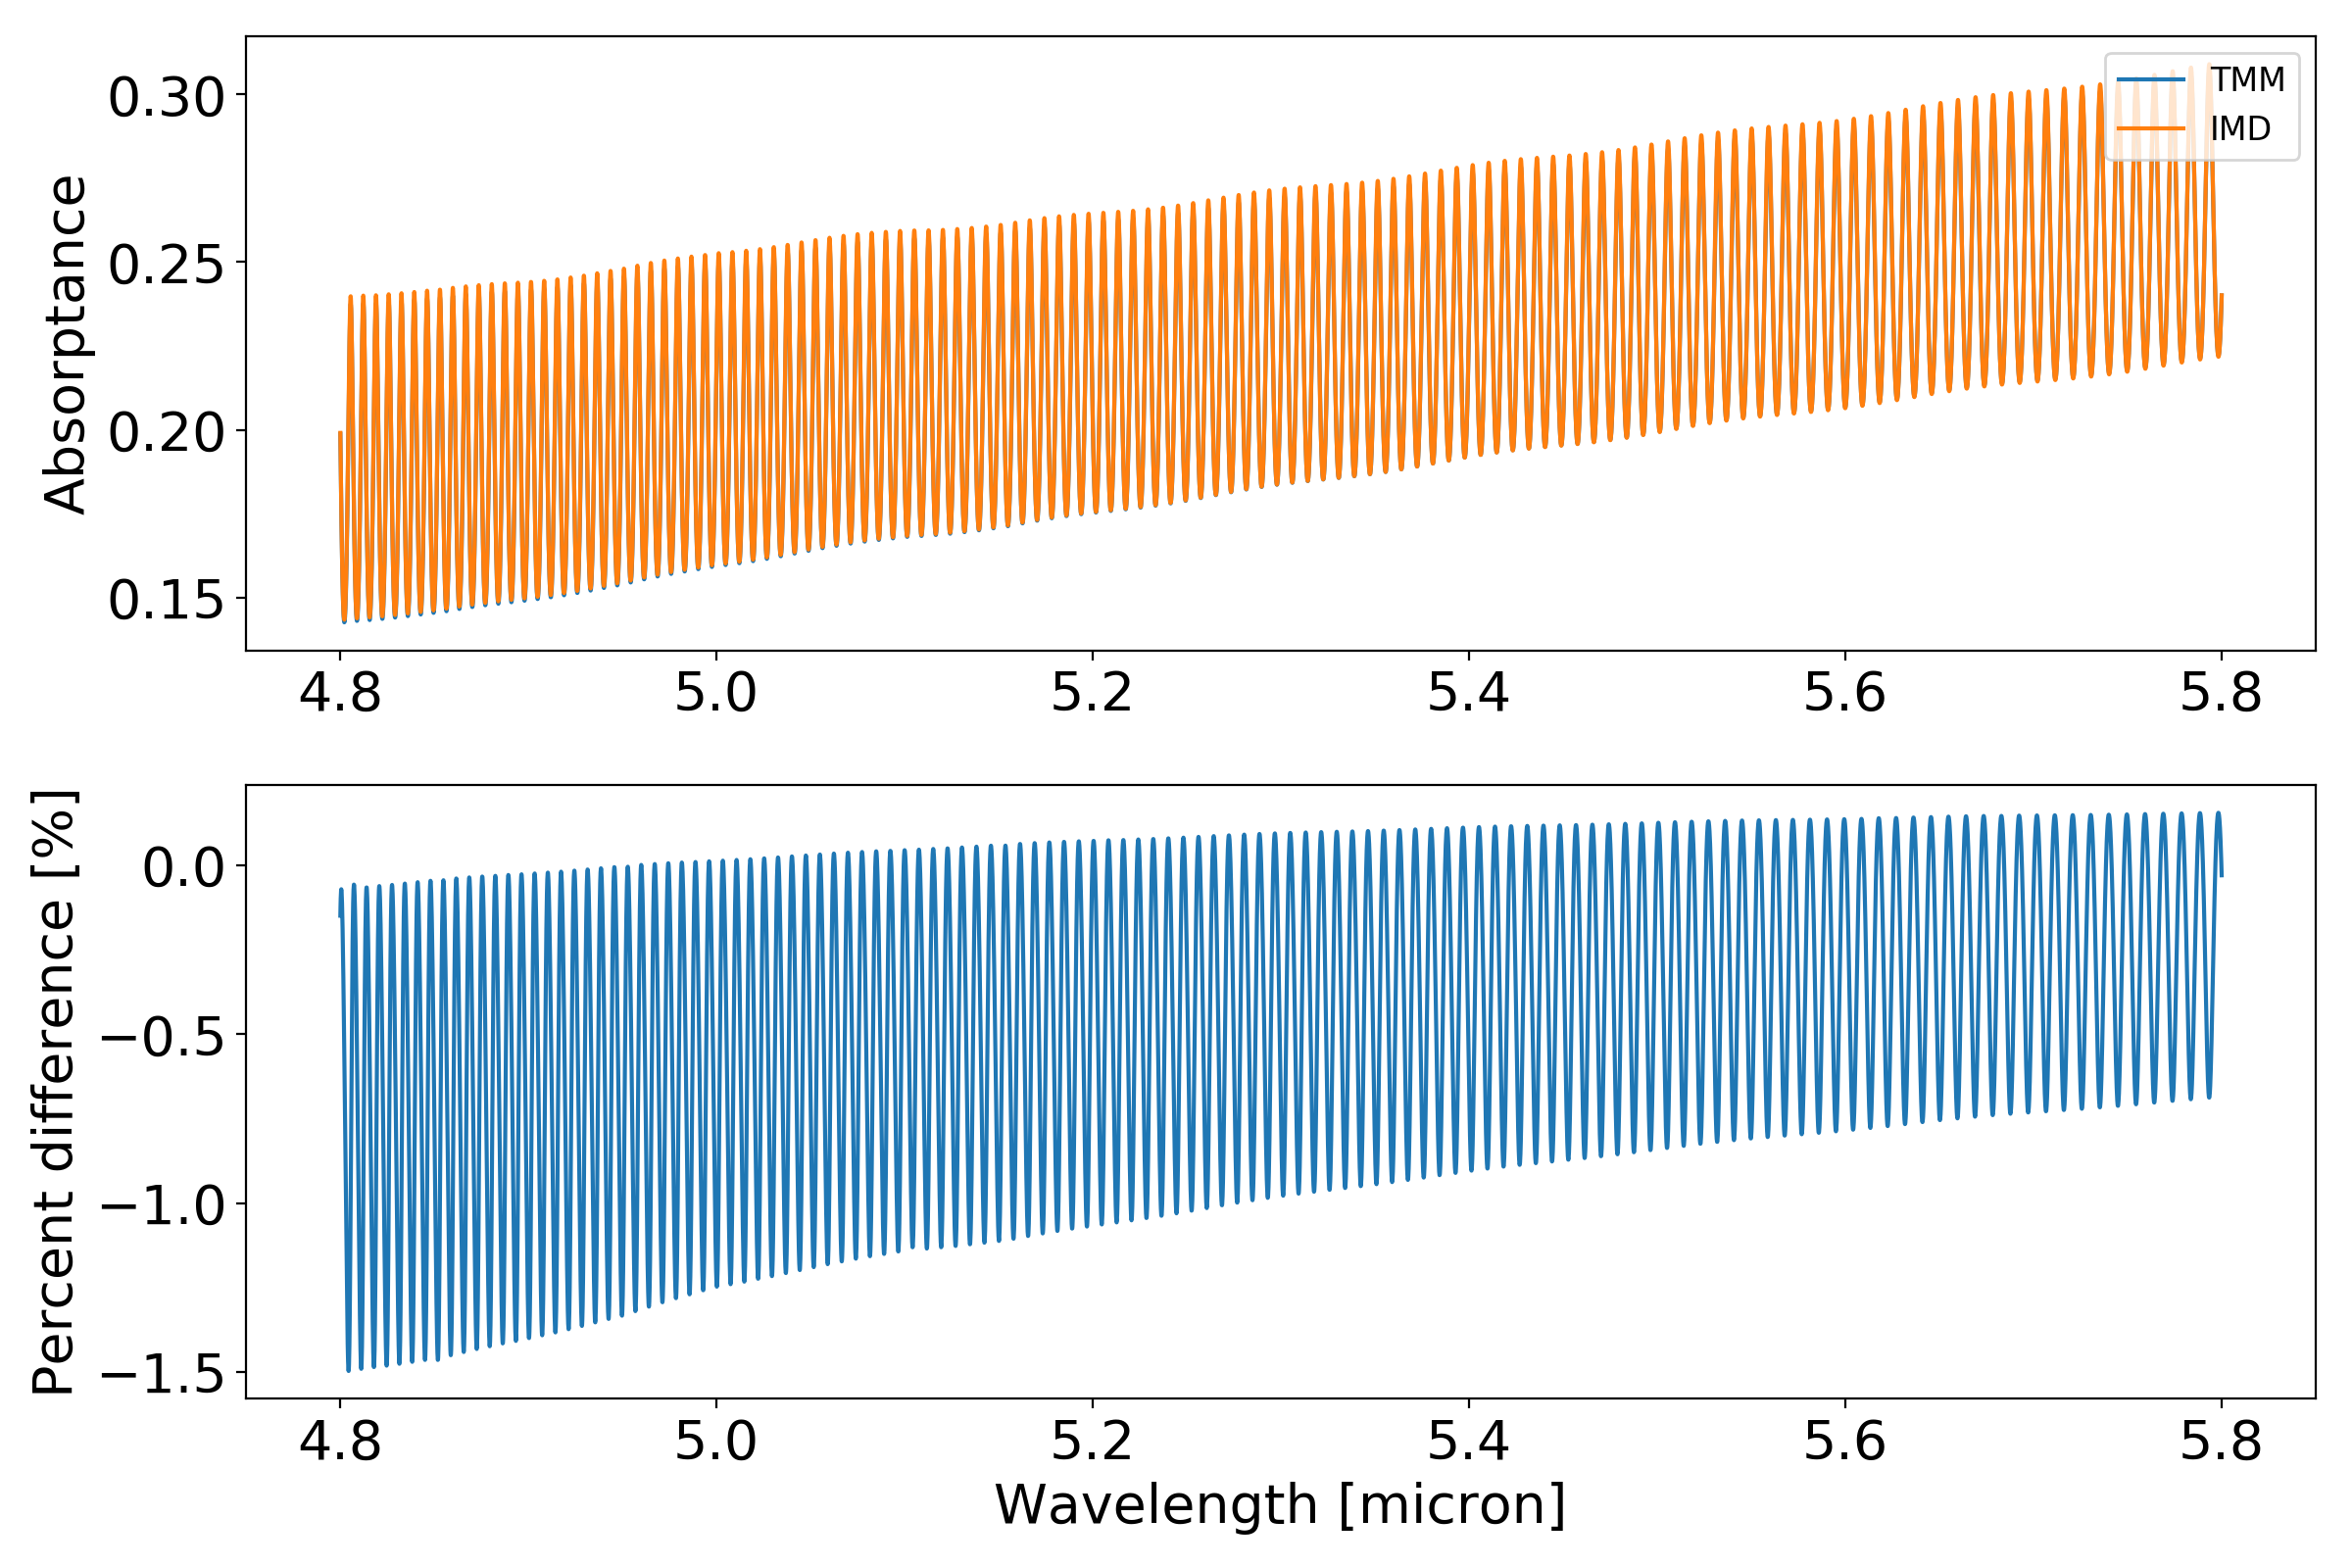

In [21]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    sig_list = [0,0,0.01,0,0]
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.not_simple_tmm(n_list, d_list, sig_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['70'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['70'])/Absorp)*100.)
# axs[1].set_ylim(-0.002,0.002)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Test 8: Compare results for ZnS layer on Si substrate on Si:As layer on Al substrate

<IPython.core.display.Javascript object>


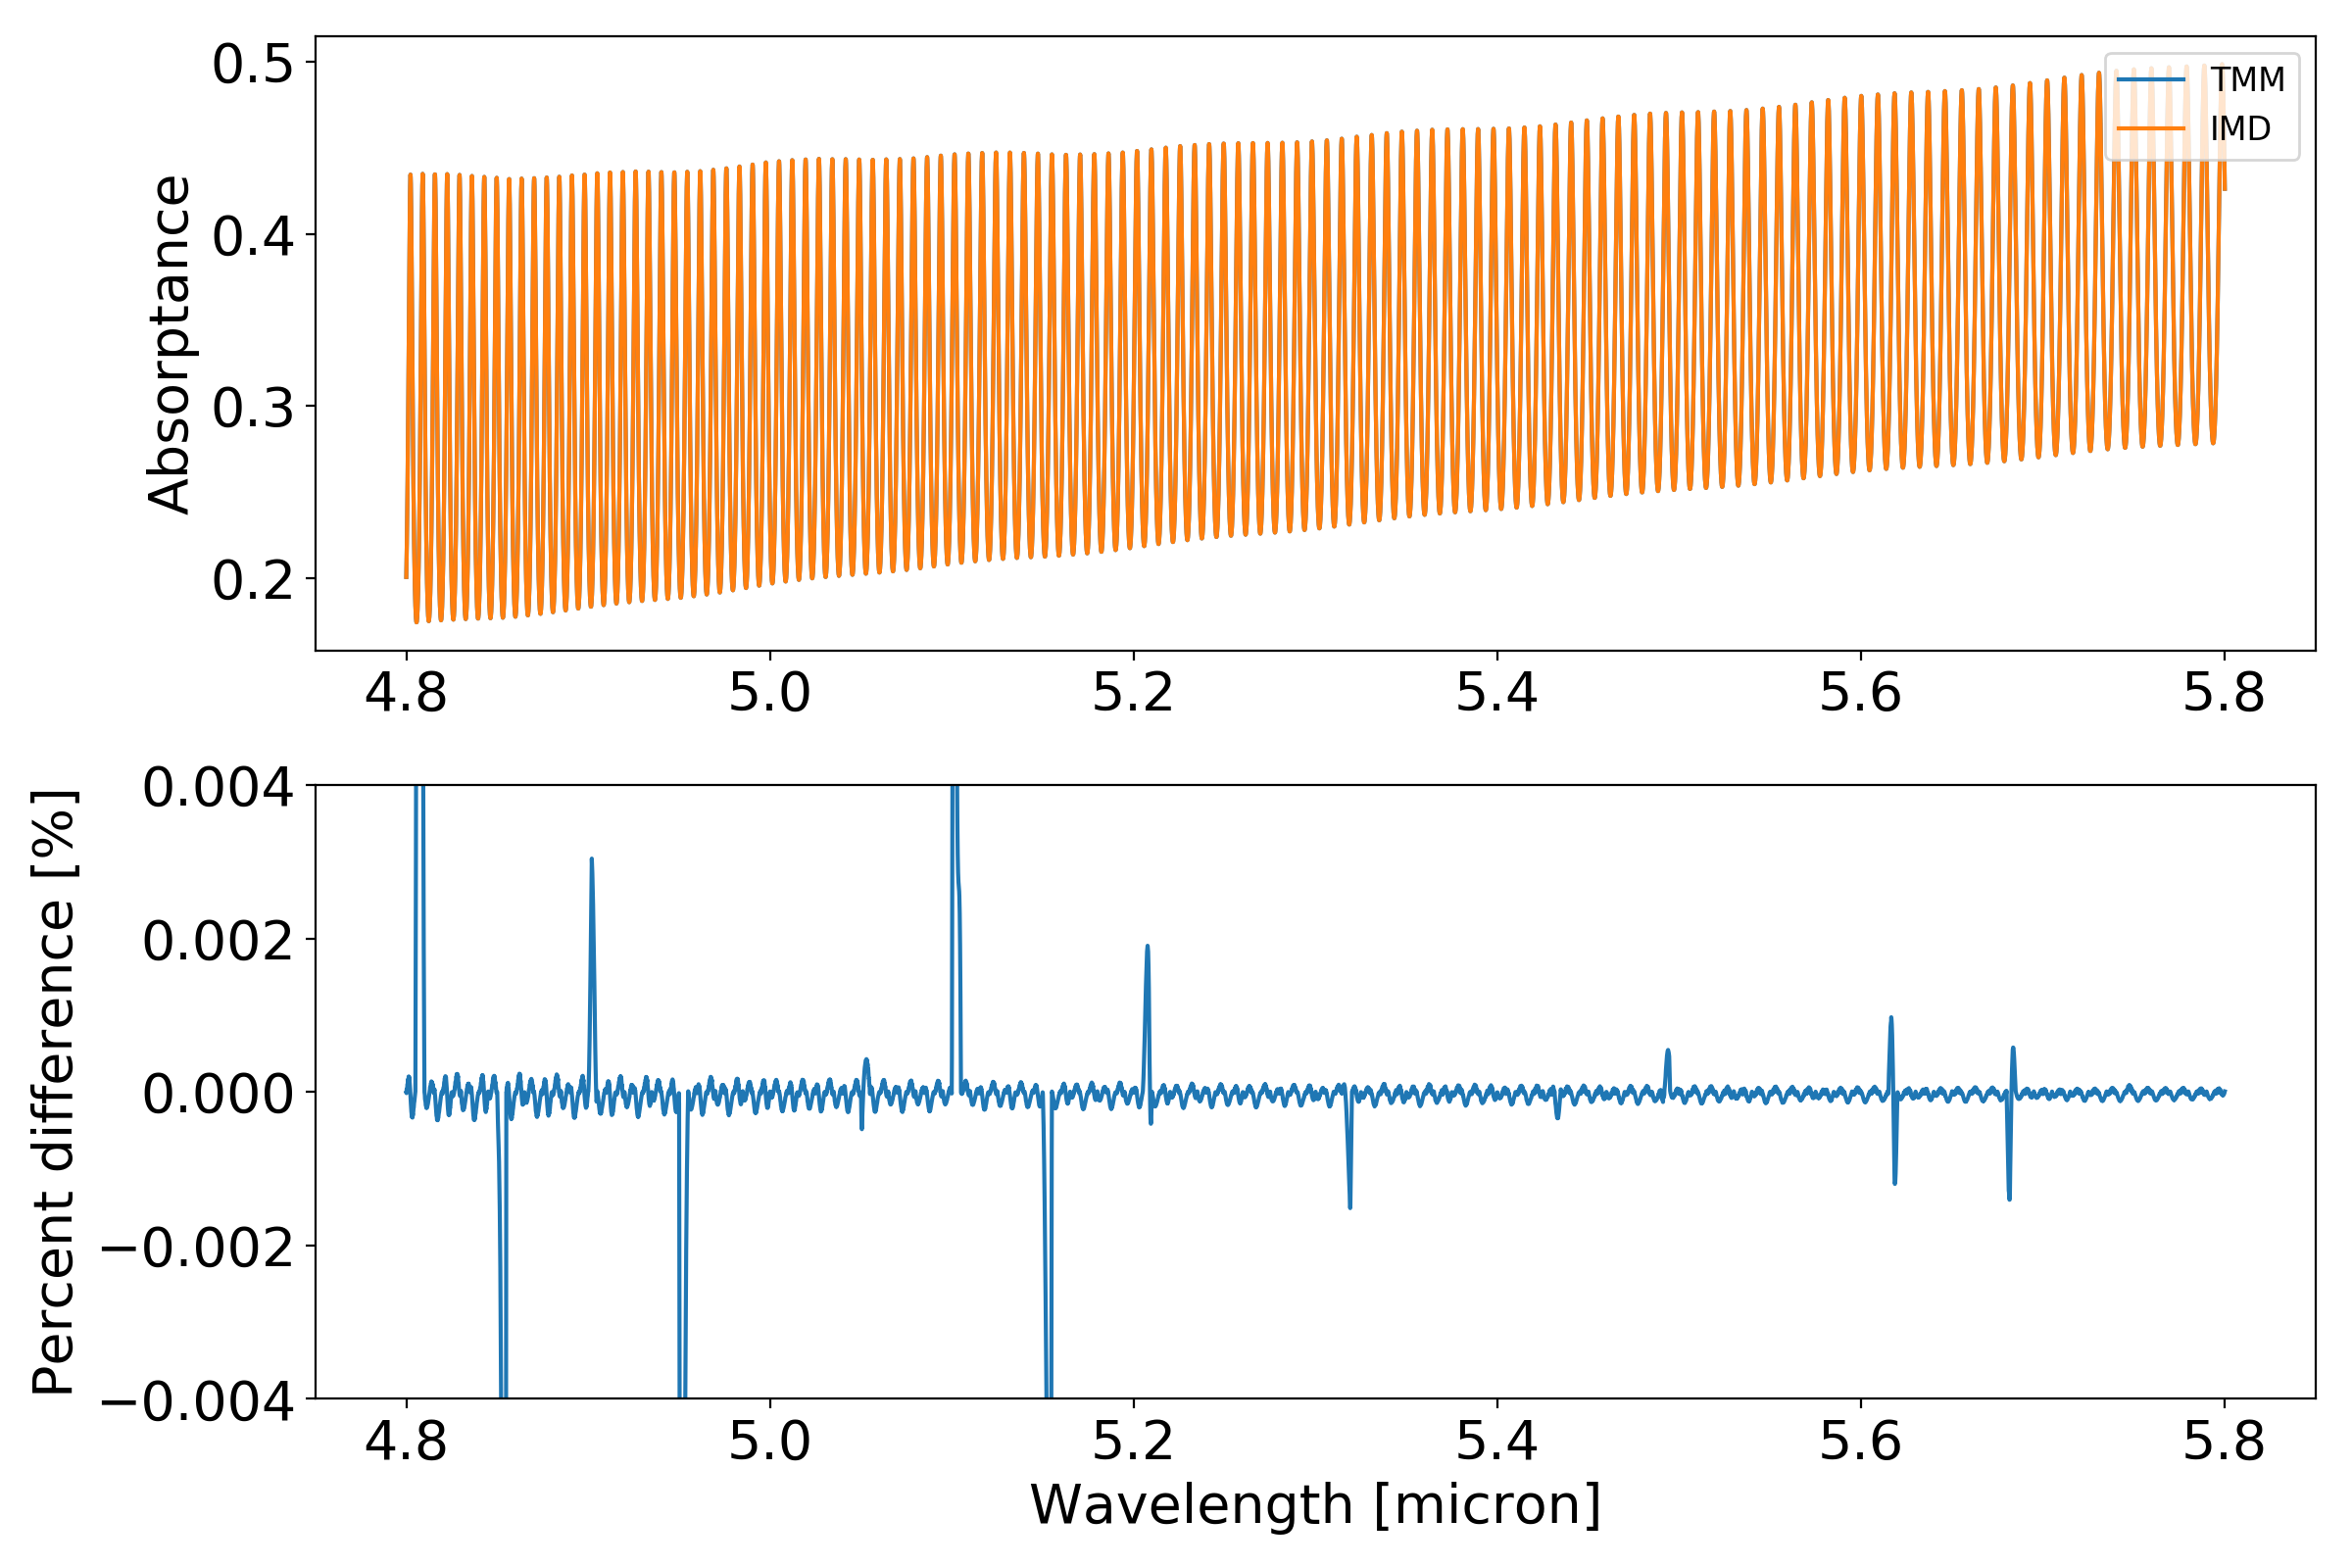

In [22]:
band = '1A'
Refl,Transm,Absorp = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], n_Al[band][i]] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl[i],Transm[i],Absorp[i] =  funcs.simple_tmm(n_list, d_list, 0*deg, lambda_vac)

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].plot(wav[band],Absorp,label='TMM')
axs[0].plot(wav[band],A[band]['80'],label='IMD')
axs[0].set_ylabel('Absorptance')
axs[0].legend(loc='upper right',fontsize=12)
axs[1].plot(wav[band],((Absorp-A[band]['80'])/Absorp)*100.)
axs[1].set_ylim(-0.004,0.004)
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Percent difference [%]')
plt.tight_layout()

### Remarks:
* The outputs determined by the IMD and TMM codes agree with each other.